In [1]:
# magics: ensures that any changes to the modules loaded below will be re-loaded automatically
%load_ext autoreload
%autoreload 2

# load general packages
import numpy as np
import matplotlib.pyplot as plt
# set correct path
import sys 
sys.path.append(r'/Users/asbjornfyhn/Desktop/Dyn Prog/DP-life-cycle')
from functions import plotgenerator as pg

In [2]:
# Import EGM model
import utils as ex2
import egm as egm

# Setup
par_EGM = ex2.setup(g_constant=False)
sol = egm.solve(par_EGM)

Shape of Ybar ()
Shape of first element (40,), and second element (40,)


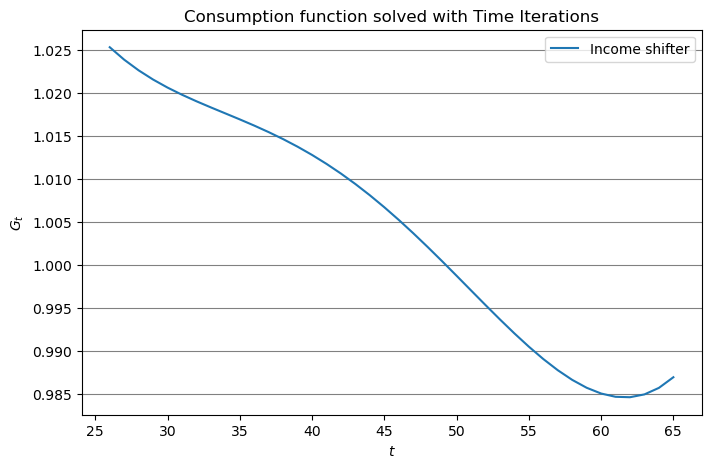

In [3]:
# Print consumption function
fig = pg.PlotFigure(figsize=(8,5),fontname='Arial')

fig.add_plot(range(par_EGM.t0,par_EGM.Tr+1),par_EGM.G, label=f"Income shifter", linestyle='-')
fig.set_ylabel(f"$G_t$")
fig.set_xlabel(f"$t$")
fig.set_title(f'Consumption function solved with Time Iterations')
fig.add_gridlines(axis='y')
fig.add_legend()
fig.show()

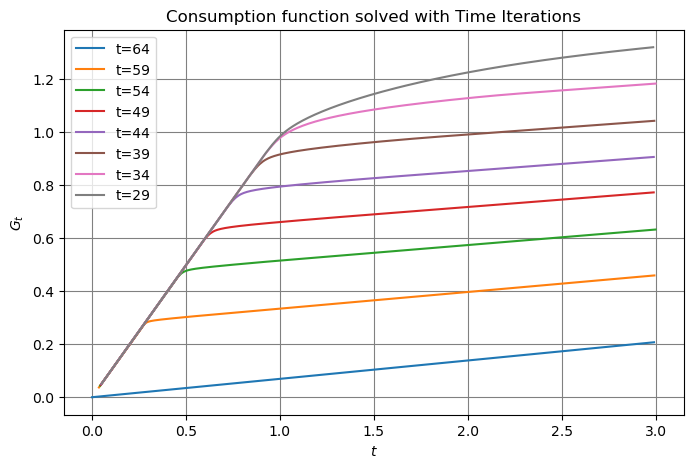

In [4]:
# Print consumption function
fig = pg.PlotFigure(figsize=(8,5),fontname='Arial')
for t in range(par_EGM.Tr_N-1,par_EGM.t0_N,-5):
    criteria = np.where(sol.m[:,t] <= 3, True, False)
    fig.add_plot(sol.m[criteria,t],sol.c[criteria,t], label=f"t={25+t}", linestyle='-')
fig.set_ylabel(f"$G_t$")
fig.set_xlabel(f"$t$")
fig.set_title(f'Consumption function solved with Time Iterations')
fig.add_gridlines(axis='both')
fig.add_legend()
fig.show()

In [5]:
sol.c.shape

(300, 41)

In [6]:
import simulations 
sim = simulations.sim_setup(par_EGM)
simulations.draw_random(par_EGM, sim)
sim = simulations.simulate(sim, par_EGM, sol)

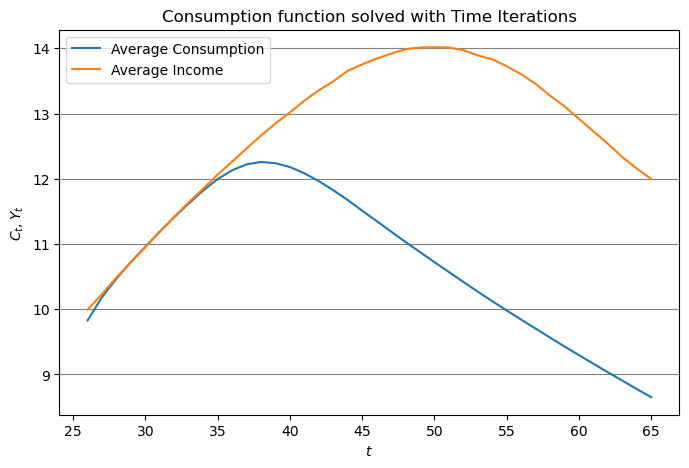

In [7]:
# Print consumption function
fig = pg.PlotFigure(figsize=(8,5),fontname='Arial')

fig.add_plot(range(par_EGM.t0,par_EGM.Tr+1),sim.C_avg, label=f"Average Consumption", linestyle='-')
fig.add_plot(range(par_EGM.t0,par_EGM.Tr+1),sim.Y_avg, label=f"Average Income", linestyle='-')
fig.set_ylabel(f"$C_t, Y_t$")
fig.set_xlabel(f"$t$")
fig.set_title(f'Consumption function solved with Time Iterations')
fig.add_gridlines(axis='y')
fig.add_legend()
fig.show()

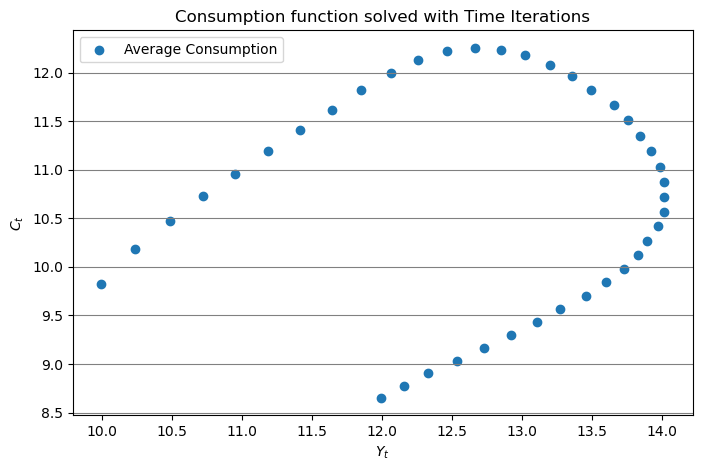

In [8]:
# Print consumption function
fig = pg.PlotFigure(figsize=(8,5),fontname='Arial')

fig.add_plot(sim.Y_avg,sim.C_avg, label=f"Average Consumption", marker='o')
fig.set_ylabel(f"$C_t$")
fig.set_xlabel(f"$Y_t$")
fig.set_title(f'Consumption function solved with Time Iterations')
fig.add_gridlines(axis='y')
fig.add_legend()
fig.show()